In [75]:
# https://tianchi.aliyun.com/notebook-ai/detail?postId=4662

In [1]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 颜色
color = sns.color_palette()
# 数据print精度
pd.set_option('precision',3) 

## 读取数据

In [3]:
redwine = pd.read_csv('winequality-red.csv',sep = ';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5


In [4]:
whitewine = pd.read_csv('winequality-white.csv',sep = ';')
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.995,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.996,3.19,0.40,9.9,6


## 数据观测

### 数据量

In [5]:
print(redwine.shape)
print(whitewine.shape)

(1599, 12)
(4898, 12)


### 数据类型

In [6]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
whitewine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


### 缺失值

In [8]:
redwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
whitewine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 统计描述

In [10]:
redwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000,1599.000
mean,8.320,0.528,0.271,2.539,0.087,15.875,46.468,0.997,3.311,0.658,10.423,5.636
std,1.741,0.179,0.195,1.410,0.047,10.460,32.895,0.002,0.154,0.170,1.066,0.808
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,22.000,0.996,3.210,0.550,9.500,5.000
50%,7.900,0.520,0.260,2.200,0.079,14.000,38.000,0.997,3.310,0.620,10.200,6.000
75%,9.200,0.640,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.730,11.100,6.000
max,15.900,1.580,1.000,15.500,0.611,72.000,289.000,1.004,4.010,2.000,14.900,8.000


In [11]:
whitewine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000,4898.000
mean,6.855,0.278,0.334,6.391,0.046,35.308,138.361,0.994,3.188,0.490,10.514,5.878
std,0.844,0.101,0.121,5.072,0.022,17.007,42.498,0.003,0.151,0.114,1.231,0.886
min,3.800,0.080,0.000,0.600,0.009,2.000,9.000,0.987,2.720,0.220,8.000,3.000
25%,6.300,0.210,0.270,1.700,0.036,23.000,108.000,0.992,3.090,0.410,9.500,5.000
50%,6.800,0.260,0.320,5.200,0.043,34.000,134.000,0.994,3.180,0.470,10.400,6.000
75%,7.300,0.320,0.390,9.900,0.050,46.000,167.000,0.996,3.280,0.550,11.400,6.000
max,14.200,1.100,1.660,65.800,0.346,289.000,440.000,1.039,3.820,1.080,14.200,9.000


## 单变量分析

直方图——distplot , kdeplot，看单变量的分布，是否正态，是否左右偏，有几个高峰等  
箱型图——boxplot，看单变量的分布，常用来找异常值  
散点图——striplot，swarmplot，看单变量的分布，与Excel中两变量相关性分布不太一样，这里的散点图更像是箱型图  
条形图——barplot,countplot，前者计算均值，后者计算个数，与Excel中的条形图非常类似  
————————————————  
版权声明：本文为CSDN博主「数据小斑马」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/cindy407/java/article/details/91489011

In [12]:
# set plot style
plt.style.use('ggplot')

In [ ]:
col = redwine.columns.to_list()  #whitewine和redwine的列名一致

### 箱型图


Figure 1: Univariate Boxplots_red wine


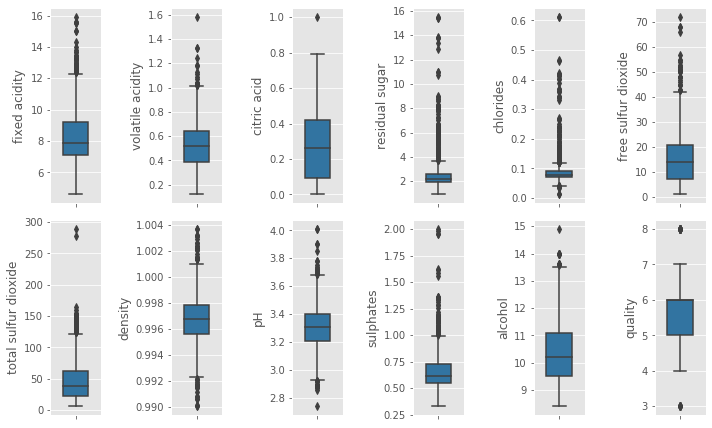

In [25]:
fig = plt.figure(figsize =(10,6))

for i in range(len(col)):
    plt.subplot(2,6,i+1)
    sns.boxplot(redwine[col[i]],orient='v',width=0.5, color=color[0])
    plt.ylabel(col[i], fontsize=12)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.9)

plt.tight_layout()
print('\nFigure 1: Univariate Boxplots_red wine')



Figure 1: Univariate Boxplots_white wine


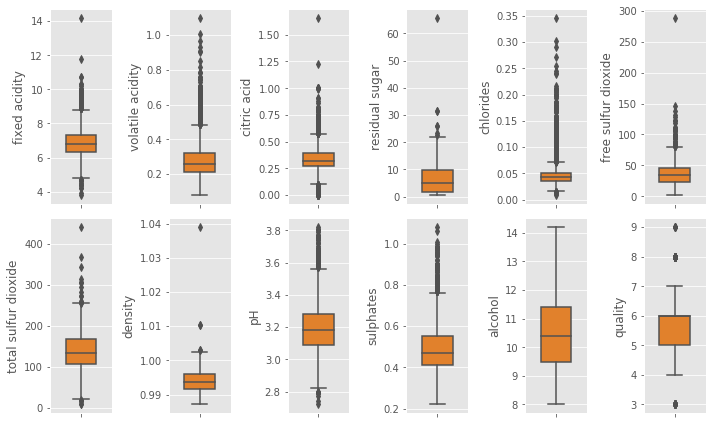

In [27]:
fig = plt.figure(figsize =(10,6))

for i in range(len(col)):
    plt.subplot(2,6,i+1)
    sns.boxplot(whitewine[col[i]],orient='v',width=0.5, color=color[1])
    plt.ylabel(col[i], fontsize=12)
#plt.subplots_adjust(left=0.2, wspace=0.8, top=0.9)

plt.tight_layout()
print('\nFigure 1: Univariate Boxplots_white wine')


图表作用:  
1.反映一组数据的分布特征，如：分布是否对称，是否存在离群点  
2.对多组数据的分布特征进行比较  
3.如果只有一个定量变量，很少用箱线图去看数据的分布，而是用直方图去观察。一般都要跟其余的定性变量做分组箱线图，可以起对比作用。（key）

图表解读：  
1.箱子的大小取决于数据的四分位距，即IQR = Q3 - Q1（Q3: 75%分位数 , Q1: 25%分位数 , Q3和Q1为四分位数)。50%的数据集中于箱体，若箱体太大即数据分布离散，数据波动较大，箱体小表示数据集中。  
2.箱子的上边为上四分位数Q3，下边为下四分位数Q1，箱体中的横线为中位数Q2（50%分位数）  
3.箱子的上触须为数据的最大值Max，下触须为数据的最小值Min（注意是非离群点的最大最小值，称为上下相邻值）  
4.若数据值 > Q3+1.5 * IQR（上限值） 或 数据值 < Q1-1.5 * IQR（下限值） ,均视为异常值。数据值 > Q3+3 * IQR 或 数据值 < Q1-3 * IQR ,均视为极值。在实际应用中，不会显示异常值与极值的界限，而且一般统称为异常值。  
也表明上下触须不一定是数据的最大最小值，  
（1）若数据的最大值比上限值小的，那么上触须顶点就是观察到的最大的；若数据的最大值比上限值大的，那么上触须顶点就是上限值，观察到的最大值就是异常点。  
（2）若数据的最小值比下限值大的，那么下触须顶点就是观察到的最小值；若数据的最小值比下限值小的，那么下触须顶点就是下限值，观察到的最小值就是异常点。  
上述情况复杂，在线范围外的，直接理解成异常值即可  
5.偏度：
对称分布：中位线在箱子中间，上下相邻值到箱子的距离等长，离群点在上下限值外的分布也大致相同。  
右偏分布：中位数更靠近下四分位数，上相邻值到箱子的距离比下相邻值到箱子的距离长，离群点多数在上限值之外。  
左偏分布：中位数更靠近上四分位数，下相邻值到箱子的距离比上相邻值到箱子的距离长，离群点多数在下限值之外。  

(-0.5, 550.5, 603.5, -0.5)

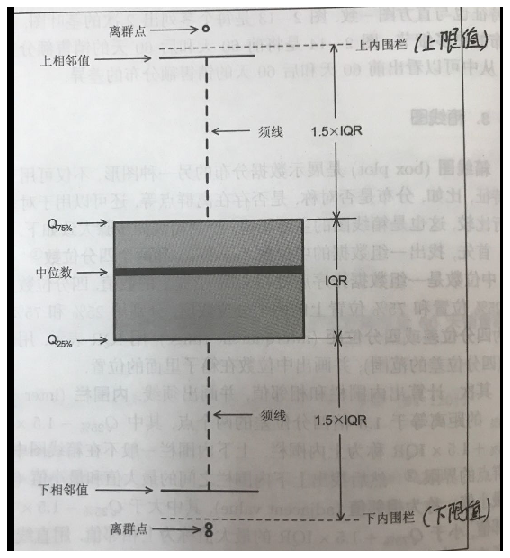

In [24]:
import matplotlib.image as mpimg 
plt.figure(figsize=(10,10))
boxplot1 = mpimg.imread('boxplot1.png')
plt.imshow(boxplot1)
plt.axis('off') # 不显示坐标轴

### 直方图


Figure 2: Univariate Histograms_red wine


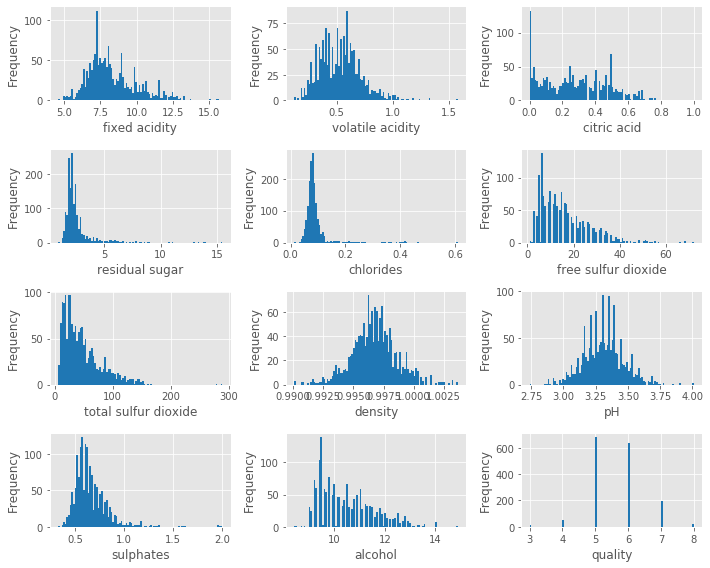

In [28]:
plt.figure(figsize=(10,8))

for i in range(len(col)):
    plt.subplot(4,3,i+1)
    redwine[col[i]].hist(bins=100, color=color[0])
    plt.xlabel(col[i], fontsize=12)
    plt.ylabel('Frequency')
plt.tight_layout()
print('\nFigure 2: Univariate Histograms_red wine')


Figure 2: Univariate Histograms_white wine


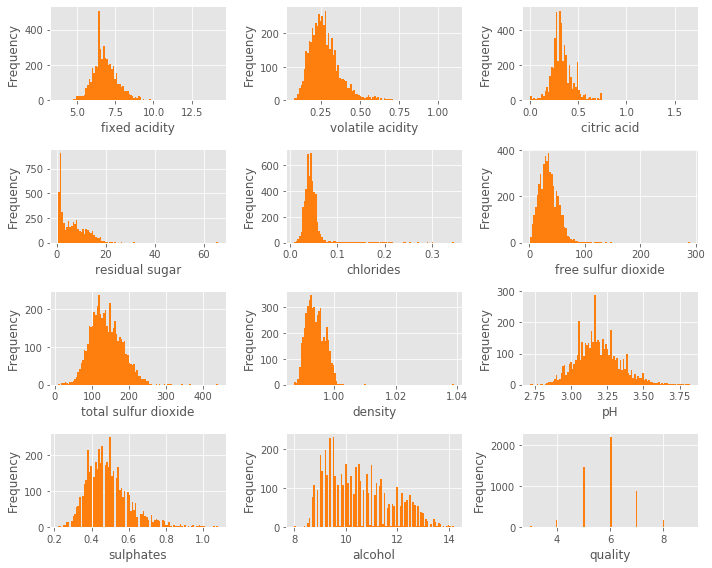

In [29]:
plt.figure(figsize=(10,8))

for i in range(len(col)):
    plt.subplot(4,3,i+1)
    whitewine[col[i]].hist(bins=100, color=color[1])
    plt.xlabel(col[i], fontsize=12)
    plt.ylabel('Frequency')
plt.tight_layout()
print('\nFigure 2: Univariate Histograms_white wine')

### 品质

这个数据集的目的是研究红酒品质和理化性质之间的关系。品质的评价范围是0-10，这个数据集中范围是3到8，有82%的红酒品质是5或6。

### 酸度相关的特征

这个数据集有7个酸度相关的特征：fixed acidity, volatile acidity, citric acid, free sulfur dioxide, total sulfur dioxide, sulphates, pH。前6个特征都与红酒的pH的相关。pH是在对数的尺度，下面对前6个特征取对数然后作histogram。另外，pH值主要是与fixed acidity有关，fixed acidity比volatile acidity和citric acid高1到2个数量级(Figure 4)，比free sulfur dioxide, total sulfur dioxide, sulphates高3个数量级。一个新特征total acid来自于前三个特征的和。


Figure 3: Acidity Features in log10 Scale_red wine


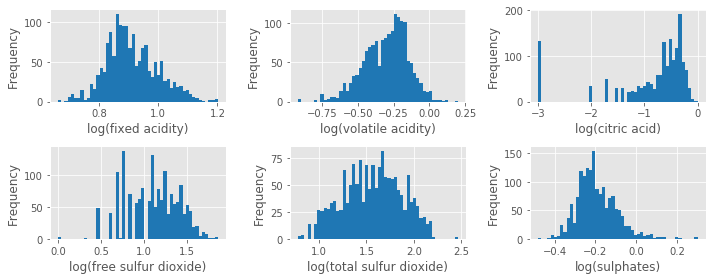

In [31]:
acidityFeat = ['fixed acidity', 'volatile acidity', 'citric acid',
               'free sulfur dioxide', 'total sulfur dioxide', 'sulphates']

plt.figure(figsize = (10, 4))

for i in range(6):
    plt.subplot(2,3,i+1)
    v = np.log10(np.clip(redwine[acidityFeat[i]].values, a_min = 0.001, a_max = None))
    plt.hist(v, bins = 50, color = color[0])
    plt.xlabel('log(' + acidityFeat[i] + ')',fontsize = 12)
    plt.ylabel('Frequency')
plt.tight_layout()
print('\nFigure 3: Acidity Features in log10 Scale_red wine')

Figure 4_red wine


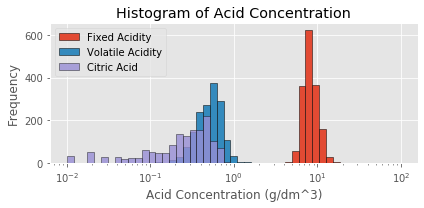

In [35]:
plt.figure(figsize=(6,3))

bins = 10**(np.linspace(-2, 2))
plt.hist(redwine['fixed acidity'], bins = bins, edgecolor = 'k', label = 'Fixed Acidity')
plt.hist(redwine['volatile acidity'], bins = bins, edgecolor = 'k', label = 'Volatile Acidity')
plt.hist(redwine['citric acid'], bins = bins, edgecolor = 'k', alpha = 0.8, label = 'Citric Acid')
plt.xscale('log')
plt.xlabel('Acid Concentration (g/dm^3)')
plt.ylabel('Frequency')
plt.title('Histogram of Acid Concentration')
plt.legend()
plt.tight_layout()

print('Figure 4_red wine')


In [34]:
# 总酸度
redwine['total acid'] = redwine['fixed acidity'] + redwine['volatile acidity'] + redwine['citric acid']

Figure 5: Total Acid Histogram_red wine


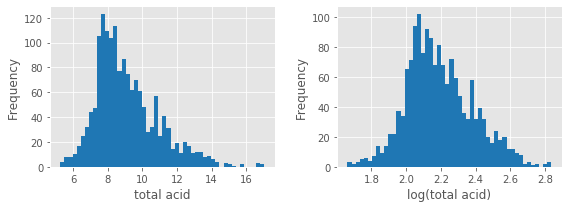

In [36]:
plt.figure(figsize = (8,3))

plt.subplot(121)
plt.hist(redwine['total acid'], bins = 50, color = color[0])
plt.xlabel('total acid')
plt.ylabel('Frequency')
plt.subplot(122)
plt.hist(np.log(redwine['total acid']), bins = 50 , color = color[0])
plt.xlabel('log(total acid)')
plt.ylabel('Frequency')
plt.tight_layout()

print("Figure 5: Total Acid Histogram_red wine")


Figure 3: Acidity Features in log10 Scale_white wine


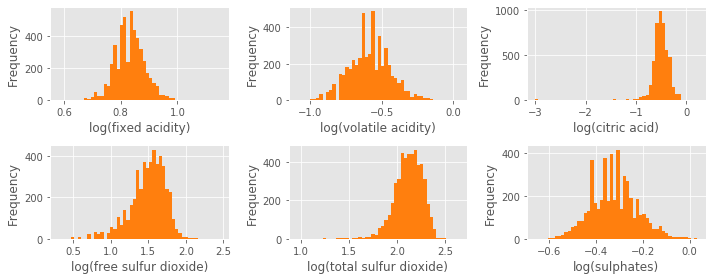

In [37]:
plt.figure(figsize = (10, 4))

for i in range(6):
    plt.subplot(2,3,i+1)
    v = np.log10(np.clip(whitewine[acidityFeat[i]].values, a_min = 0.001, a_max = None))
    plt.hist(v, bins = 50, color = color[1])
    plt.xlabel('log(' + acidityFeat[i] + ')',fontsize = 12)
    plt.ylabel('Frequency')
plt.tight_layout()
print('\nFigure 3: Acidity Features in log10 Scale_white wine')

Figure 4_white wine


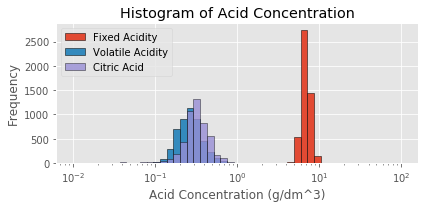

In [38]:
plt.figure(figsize=(6,3))

bins = 10**(np.linspace(-2, 2))
plt.hist(whitewine['fixed acidity'], bins = bins, edgecolor = 'k', label = 'Fixed Acidity')
plt.hist(whitewine['volatile acidity'], bins = bins, edgecolor = 'k', label = 'Volatile Acidity')
plt.hist(whitewine['citric acid'], bins = bins, edgecolor = 'k', alpha = 0.8, label = 'Citric Acid')
plt.xscale('log')
plt.xlabel('Acid Concentration (g/dm^3)')
plt.ylabel('Frequency')
plt.title('Histogram of Acid Concentration')
plt.legend()
plt.tight_layout()

print('Figure 4_white wine')

In [39]:
# 总酸度
whitewine['total acid'] = whitewine['fixed acidity'] + whitewine['volatile acidity'] + whitewine['citric acid']

Figure 5: Total Acid Histogram_white wine


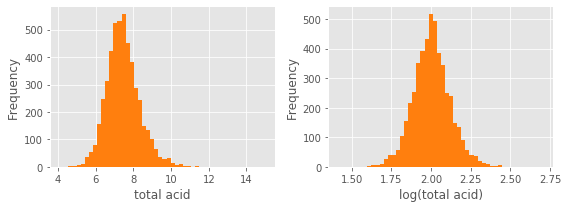

In [41]:
plt.figure(figsize = (8,3))

plt.subplot(121)
plt.hist(whitewine['total acid'], bins = 50, color = color[1])
plt.xlabel('total acid')
plt.ylabel('Frequency')
plt.subplot(122)
plt.hist(np.log(whitewine['total acid']), bins = 50 , color = color[1])
plt.xlabel('log(total acid)')
plt.ylabel('Frequency')
plt.tight_layout()

print("Figure 5: Total Acid Histogram_white wine")

## 甜度

Residual sugar 与酒的甜度相关，通常用来区别各种红酒，干红（<=4 g/L), 半干（4-12 g/L）,半甜（12-45 g/L），和甜（>45 g/L)。 这个数据中，主要为干红，没有甜葡萄酒。

In [43]:
# Residual sugar
redwine['sweetness'] = pd.cut(redwine['residual sugar'], bins = [0, 4, 12, 45], 
                         labels=["dry", "medium dry", "semi-sweet"])

In [44]:
redwine['sweetness'].value_counts()

dry           1474
medium dry     117
semi-sweet       8
Name: sweetness, dtype: int64

Figure 6: Sweetness_red wine


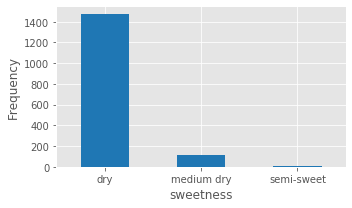

In [45]:
plt.figure(figsize = (5,3))

redwine['sweetness'].value_counts().plot(kind = 'bar', color = color[0])
plt.xticks(rotation=0)
plt.xlabel('sweetness', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.tight_layout()
print("Figure 6: Sweetness_red wine")


白酒中dry(<4)和medium dry(4-12)较多

In [46]:
# Residual sugar
whitewine['sweetness'] = pd.cut(whitewine['residual sugar'], bins = [0, 4, 12, 45], 
                         labels=["dry", "medium dry", "semi-sweet"])

In [47]:
whitewine['sweetness'].value_counts()

dry           2097
medium dry    1975
semi-sweet     825
Name: sweetness, dtype: int64

Figure 6: Sweetness_white wine


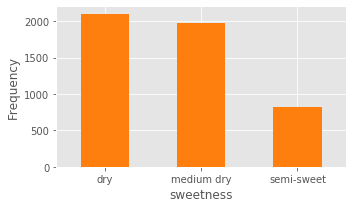

In [48]:
plt.figure(figsize = (5,3))

whitewine['sweetness'].value_counts().plot(kind = 'bar', color = color[1])
plt.xticks(rotation=0)
plt.xlabel('sweetness', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.tight_layout()
print("Figure 6: Sweetness_white wine")

## 双变量分析

变量关系图——jointplot，pairplot，双变量或多变量的两两关系图，这个就是Excel常见的散点图了  
回归图——lmplot，regplot，可以画线性和非线性回归  
热力图——heatmap，直观展示两两变量之间的相关程度
多类型箱型图----可用于比较不同类型的分布或按不同类别进行比较

### 红酒品质和理化特征的关系

In [53]:
col = redwine.columns.to_list()[:11] + ['total acid']  #不包括quality和sweetness
col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'total acid']


Figure 7: Physicochemical Properties and Wine Quality by Boxplot_red wine


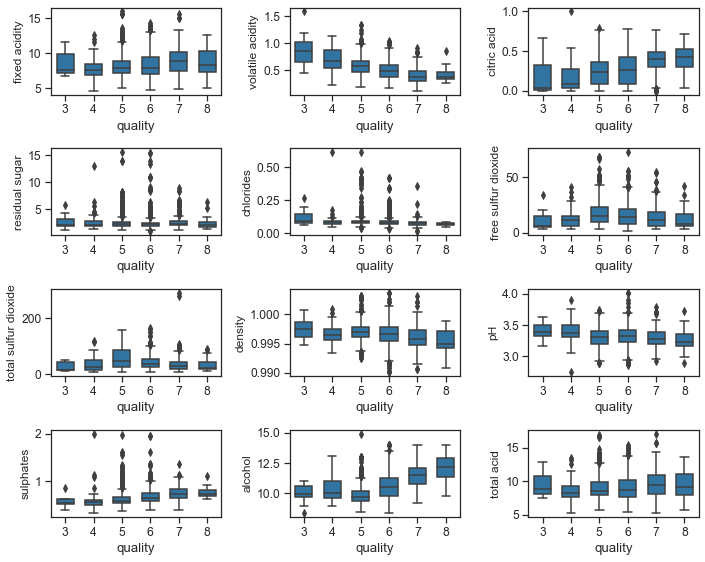

In [54]:
sns.set_style('ticks')  #四周都有刻度线的白背景
sns.set_context("notebook", font_scale= 1.1)  #四种预设，按相对尺寸的顺序(线条越来越粗)，分别是paper，notebook, talk, and poster

plt.figure(figsize = (10, 8))

for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(x ='quality', y = col[i], data = redwine, color = color[0], width = 0.6)    
    plt.ylabel(col[i],fontsize = 12)
    
plt.tight_layout()
print("\nFigure 7: Physicochemical Properties and Wine Quality by Boxplot_red wine")


Figure 7: Physicochemical Properties and Wine Quality by Boxplot_white wine


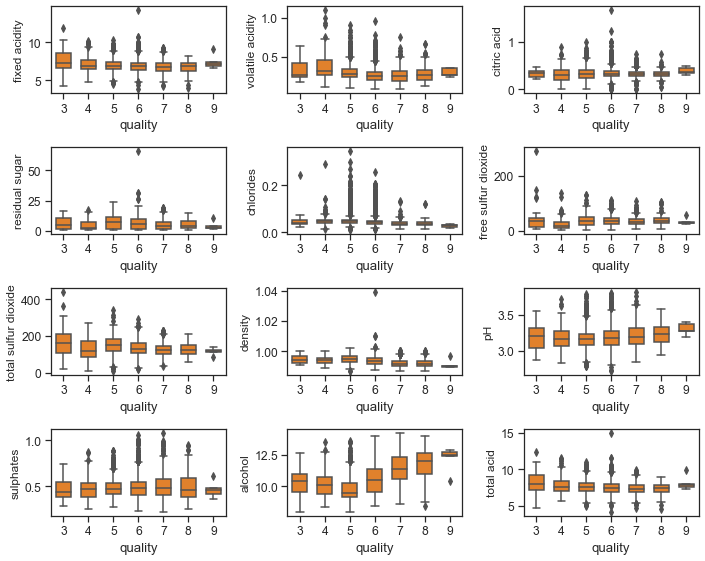

In [55]:
sns.set_style('ticks')  #四周都有刻度线的白背景
sns.set_context("notebook", font_scale= 1.1)  #四种预设，按相对尺寸的顺序(线条越来越粗)，分别是paper，notebook, talk, and poster

plt.figure(figsize = (10, 8))

for i in range(12):
    plt.subplot(4,3,i+1)
    sns.boxplot(x ='quality', y = col[i], data = whitewine, color = color[1], width = 0.6)    
    plt.ylabel(col[i],fontsize = 12)
    
plt.tight_layout()
print("\nFigure 7: Physicochemical Properties and Wine Quality by Boxplot_white wine")


Figure 8: Pairwise Correlation Plot_red wine


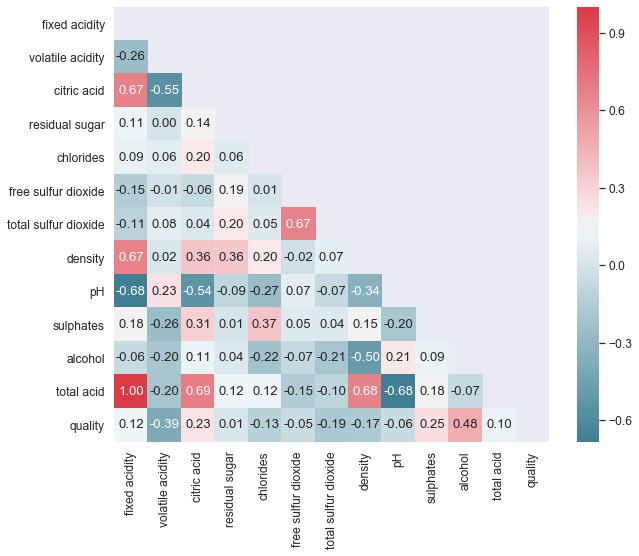

In [56]:
sns.set_style("dark")

plt.figure(figsize = (10,8))

col = redwine.columns.to_list()[:11] + ['total acid', 'quality']  #不包含sweetness
mcorr = redwine[col].corr()
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #上三角
cmap = sns.diverging_palette(220, 10, as_cmap=True)  #调色板
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
print("\nFigure 8: Pairwise Correlation Plot_red wine")    


Figure 8: Pairwise Correlation Plot_white wine


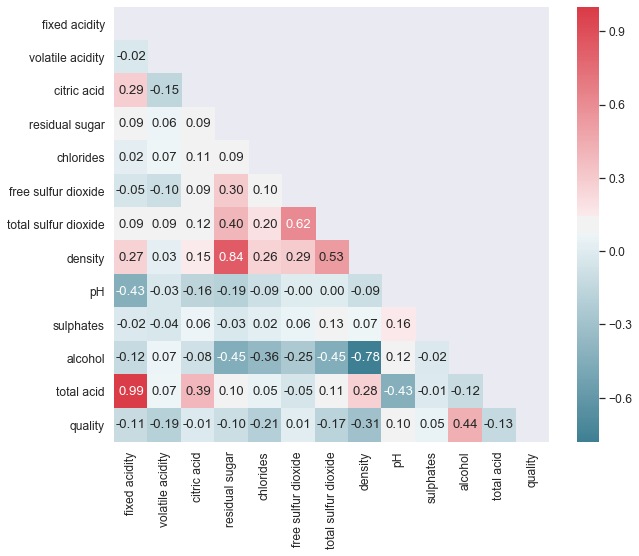

In [57]:
sns.set_style("dark")

plt.figure(figsize = (10,8))

col = whitewine.columns.to_list()[:11] + ['total acid', 'quality']  #不包含sweetness
mcorr = whitewine[col].corr()
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True  #上三角
cmap = sns.diverging_palette(220, 10, as_cmap=True)  #调色板
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
print("\nFigure 8: Pairwise Correlation Plot_white wine")    

1、品质好的酒有更高的柠檬酸，硫酸盐，和酒精度数。硫酸盐(硫酸钙)的加入通常是调整酒的酸度的。其中酒精度数和品质的相关性最高。  
2、品质好的酒有较低的挥发性酸类，密度，和pH。  
3、残留糖分，氯离子，二氧化硫似乎对酒的品质影响不大。  

### 密度和酒精浓度

密度和酒精浓度是相关的，物理上，两者并不是线性关系。Figure 8展示了两者的关系。另外密度还与酒中其他物质的含量有关，但是关系很小。

Figure 9: Density vs Alcohol_red wine


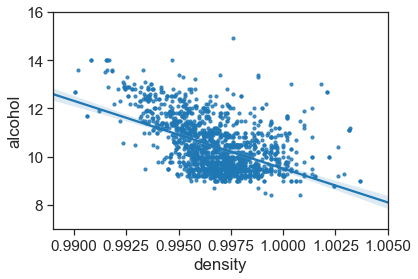

In [58]:
# style
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)

# plot figure
plt.figure(figsize = (6,4))

sns.regplot(x='density', y = 'alcohol', data = redwine, scatter_kws = {'s':10}, color = color[0])
plt.xlim(0.989, 1.005)
plt.ylim(7,16)
print('Figure 9: Density vs Alcohol_red wine')

Figure 9: Density vs Alcohol_red wine


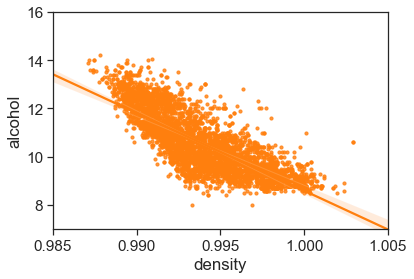

In [62]:
# style
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)

# plot figure
plt.figure(figsize = (6,4))

sns.regplot(x='density', y = 'alcohol', data = whitewine, scatter_kws = {'s':10}, color = color[1])
plt.xlim(0.985, 1.005)
plt.ylim(7,16)
print('Figure 9: Density vs Alcohol_red wine')

### 酸性物质含量和pH

pH和非挥发性酸性物质有-0.683的相关性。因为非挥发性酸性物质的含量远远高于其他酸性物质，总酸性物质(total acidity)这个特征并没有太多意义。

Figure 10: pH vs acid_red wine


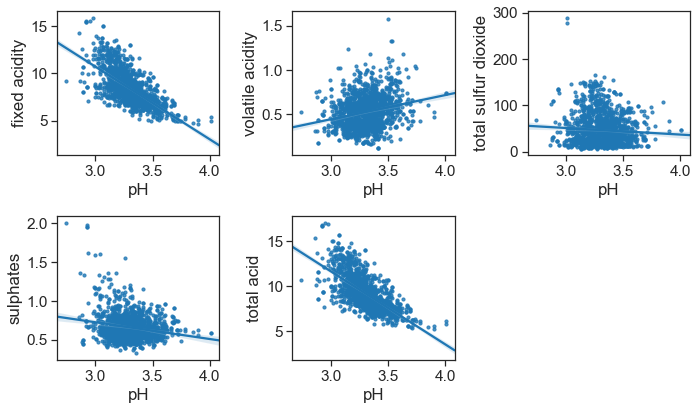

In [63]:
acidity_related = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 
                   'sulphates', 'total acid']

plt.figure(figsize = (10,6))

for i in range(5):
    plt.subplot(2,3,i+1)
    sns.regplot(x='pH', y = acidity_related[i], data = redwine, scatter_kws = {'s':10}, color = color[0])
plt.tight_layout()
print("Figure 10: pH vs acid_red wine")

Figure 10: pH vs acid_white wine


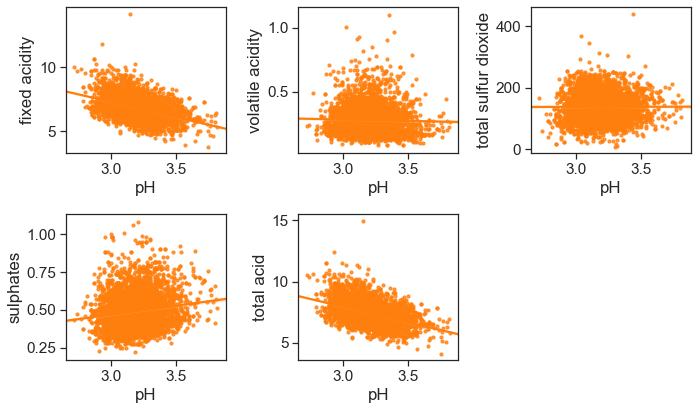

In [64]:
acidity_related = ['fixed acidity', 'volatile acidity', 'total sulfur dioxide', 
                   'sulphates', 'total acid']

plt.figure(figsize = (10,6))

for i in range(5):
    plt.subplot(2,3,i+1)
    sns.regplot(x='pH', y = acidity_related[i], data = whitewine, scatter_kws = {'s':10}, color = color[1])
plt.tight_layout()
print("Figure 10: pH vs acid_white wine")

## 多变量分析

与品质相关性最高的三个特征是酒精浓度，挥发性酸度，和柠檬酸。

### 酒精浓度，挥发性酸和品质

Figure 11-1: Scatter Plots of Alcohol, Volatile Acid and Quality_red wine


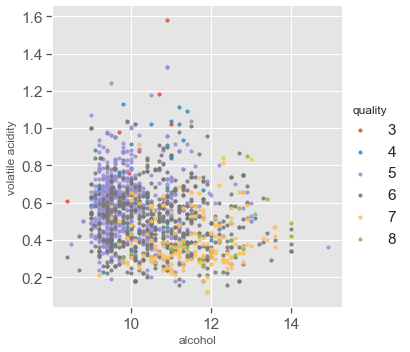

In [67]:
plt.style.use('ggplot')

sns.lmplot(x = 'alcohol', y = 'volatile acidity', hue = 'quality', 
           data = redwine, fit_reg = False, scatter_kws={'s':10}, height = 5)
print("Figure 11-1: Scatter Plots of Alcohol, Volatile Acid and Quality_red wine")


Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality_red wine


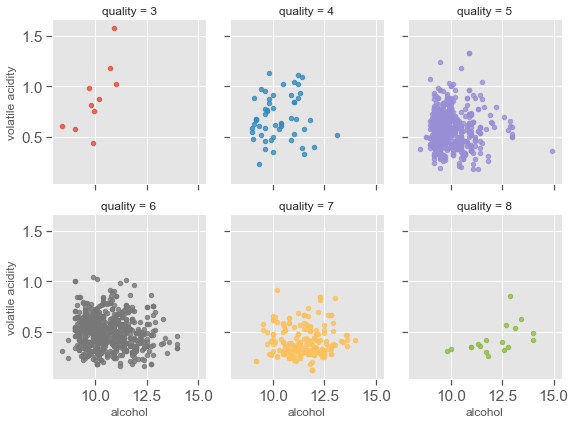

In [70]:
sns.lmplot(x = 'alcohol', y = 'volatile acidity', col='quality', hue = 'quality', 
           data = redwine, fit_reg = False, height = 3,  aspect = 0.9, col_wrap=3,
           scatter_kws={'s':20})
print("Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality_red wine")

对于好酒（7，8）以及差酒（3，4），关系很明显。但是对于中等酒（5，6），酒精浓度的挥发性酸度有很大程度的交叉。

Figure 11-1: Scatter Plots of Alcohol, Volatile Acid and Quality_white wine


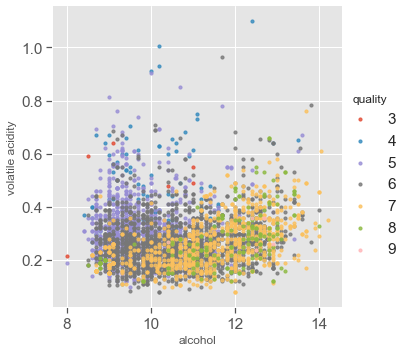

In [68]:
plt.style.use('ggplot')

sns.lmplot(x = 'alcohol', y = 'volatile acidity', hue = 'quality', 
           data = whitewine, fit_reg = False, scatter_kws={'s':10}, height = 5)
print("Figure 11-1: Scatter Plots of Alcohol, Volatile Acid and Quality_white wine")

Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality_white wine


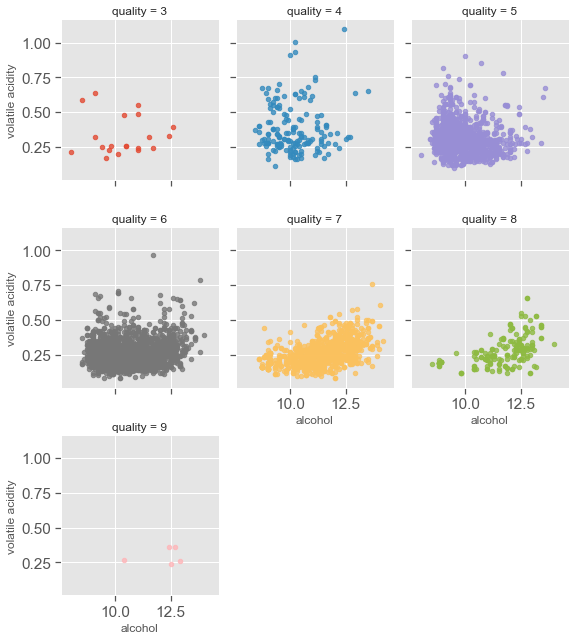

In [72]:
sns.lmplot(x = 'alcohol', y = 'volatile acidity', col='quality', hue = 'quality', 
           data = whitewine, fit_reg = False, height = 3,  aspect = 0.9, col_wrap=3,
           scatter_kws={'s':20})
print("Figure 11-2: Scatter Plots of Alcohol, Volatile Acid and Quality_white wine")

### pH，非挥发性酸，和柠檬酸

Figure 12: pH with Fixed Acidity and Citric Acid_red wine


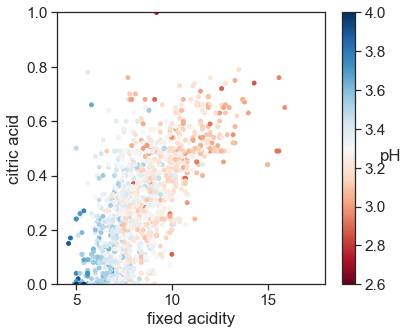

In [73]:
# style
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)

plt.figure(figsize=(6,5))
cm = plt.cm.get_cmap('RdBu')
sc = plt.scatter(redwine['fixed acidity'], redwine['citric acid'], c=redwine['pH'], vmin=2.6, vmax=4, s=15, cmap=cm)
bar = plt.colorbar(sc)
bar.set_label('pH', rotation = 0)
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.xlim(4,18)
plt.ylim(0,1)
print('Figure 12: pH with Fixed Acidity and Citric Acid_red wine')

Figure 12: pH with Fixed Acidity and Citric Acid_white wine


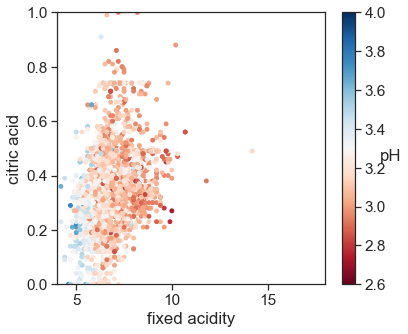

In [74]:
# style
sns.set_style('ticks')
sns.set_context("notebook", font_scale= 1.4)

plt.figure(figsize=(6,5))
cm = plt.cm.get_cmap('RdBu')
sc = plt.scatter(whitewine['fixed acidity'], whitewine['citric acid'], c=whitewine['pH'], vmin=2.6, vmax=4, s=15, cmap=cm)
bar = plt.colorbar(sc)
bar.set_label('pH', rotation = 0)
plt.xlabel('fixed acidity')
plt.ylabel('citric acid')
plt.xlim(4,18)
plt.ylim(0,1)
print('Figure 12: pH with Fixed Acidity and Citric Acid_white wine')

pH和非挥发性的酸以及柠檬酸有相关性。整体趋势也很合理，即浓度越高，pH越低。

## 总结

整体而言，红酒的品质主要与酒精浓度，挥发性酸，和柠檬酸有关。对于品质优于7，或者劣于4的酒，直观上是线性可分的。但是品质为5，6的酒很难线性区分。